In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
# 바차트 그냥 생성하는 함수
def bar_chart(fe):
    survived = train[train['Survived'] == 1][fe].value_counts()
    dead = train[train['Survived'] == 0][fe].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    
# 데이터 읽어오기
train = pd.read_csv("./train.csv") 
test = pd.read_csv("./test.csv")



In [285]:
train.shape # (891, 12)
# test.shape #(418, 11)


(891, 12)

In [286]:
train.isna().sum()
# test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [287]:
train.dtypes
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## feature engineering
 ## : 특성 벡터로 만들어야 함

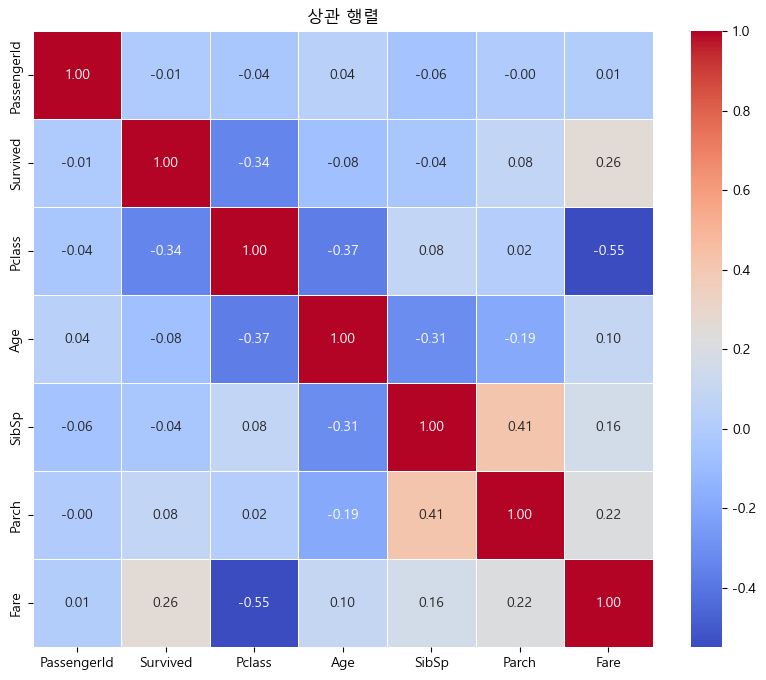

In [288]:

#  1. 상관계수 확인
      ##  숫자로만 된 값이 있어야 함
      ## 범주형(catergory형) or 문자형제외

# 숫자형 데이터만 선택
numeric_data = train.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_data.corr()

# print(correlation_matrix)

# 상관계수 히트맵 생성
plt.figure(figsize=(10, 8))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관 행렬')  # 히트맵 제목 설정
plt.show()



## name  : 이름에 잡다한 수식어 제거 => 간소화

In [289]:
# train 과 test 데이터를 한번에 변환하기 위해 List 에 담음
train_test_data=[train,test]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [290]:
# .으로 연결된 경우 mr. 같이 호칭인 경우가 많으므로 이런 패턴을 찾는다
#   => DataFrame 과 Series 차이: 
#   > DataFrame: 2차원의 레이블이 붙은 데이터 구조체
#   > Series: 1차원의 레이블이 붙은 배열입니다. 
#             DataFrame에서 단일 열 또는 행을 선택하면 Series 객체가 반환됩니다.



# expand= false는 DataFrame이 아닌 Series로 반환
for data in train_test_data:
    data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Master','Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer','Dona'], 'Other')



In [291]:
# 호칭별 수
print(train['Title'].value_counts())
print("================")
print(test['Title'].value_counts())


Title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64
Title
Mr       240
Miss      78
Mrs       72
Other     28
Name: count, dtype: int64


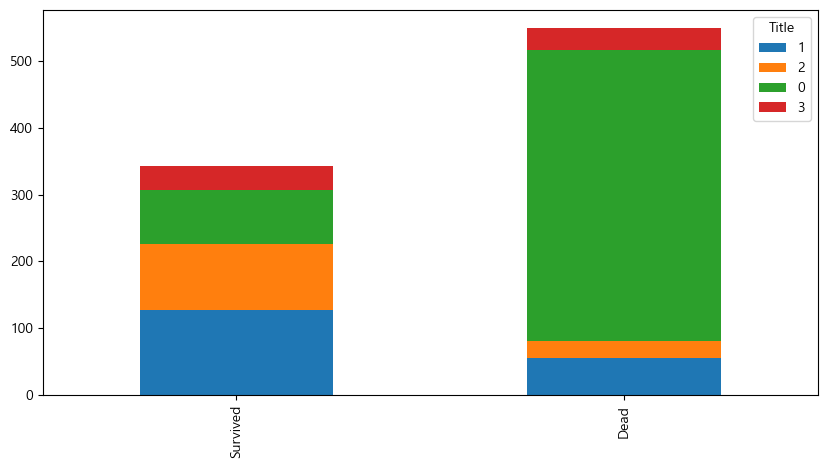

In [292]:
# 각 호칭을 0,1,2,3으로 카테고리화 한후
title_mapping={"Mr":0, "Miss":1, "Mrs":2,"Other":3}

# title 칼럼에 삽입
for dataset in train_test_data:
    dataset['Title']=dataset["Title"].map(title_mapping)


bar_chart('Title')


# sex

In [293]:
sex_mapping={"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
    

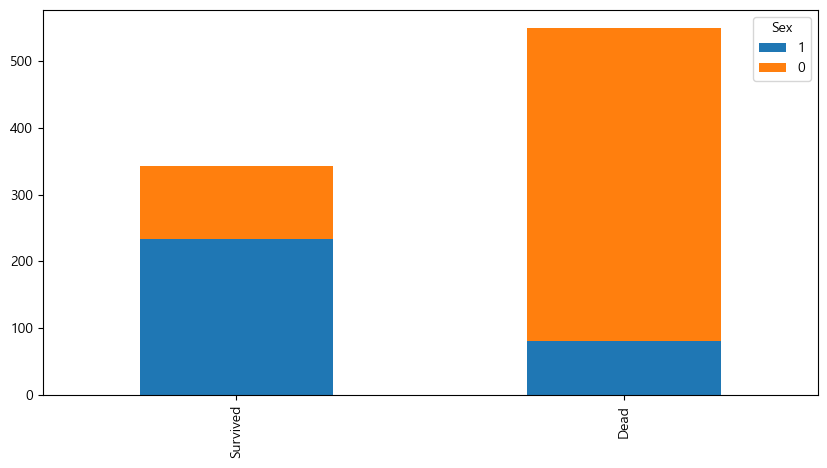

In [294]:
bar_chart('Sex')

# age : 
### 결측치/전체개수 177개/891개
### ms,mrs등의 정보로 남여별  age 중위값으로 결측치 매꾸기

In [295]:
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)


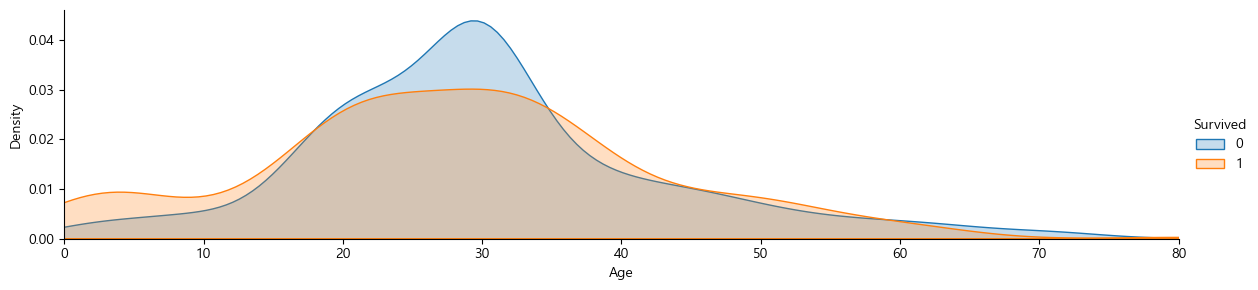

In [296]:
facet= sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

### Binning: 연속형 변수를 여러 범주로 구분하는 데이터 전처리 기법
#### 분석을 더 간단하게 하거나 특정 알고리즘 성능을 높이는데 도움이 됨

> child: ~16세 <br>
young: 17~26세<br>
adult: 27~36세<br>
mid-age: 37~62세<br>
senior: 63세~

In [297]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3
    dataset.loc[(dataset['Age']>62) ,'Age']=4



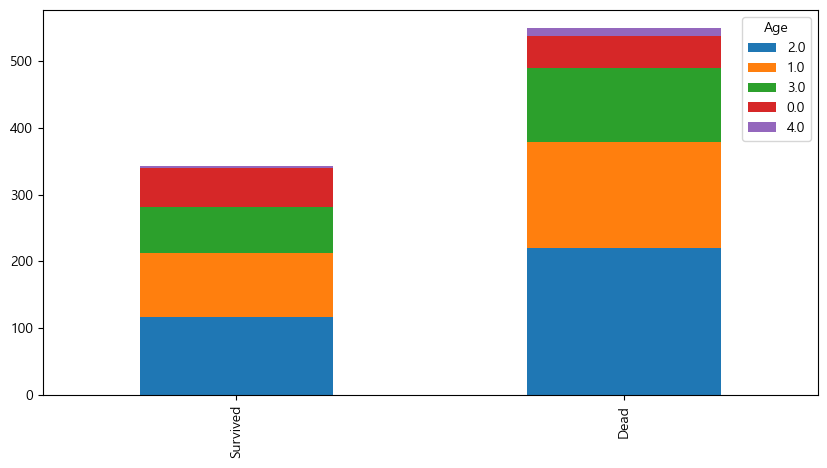

In [298]:
bar_chart('Age')

# Embarked : 탑승항구
### > C = Cherbourg, Q = Queenstown, S = Southampton

<Axes: >

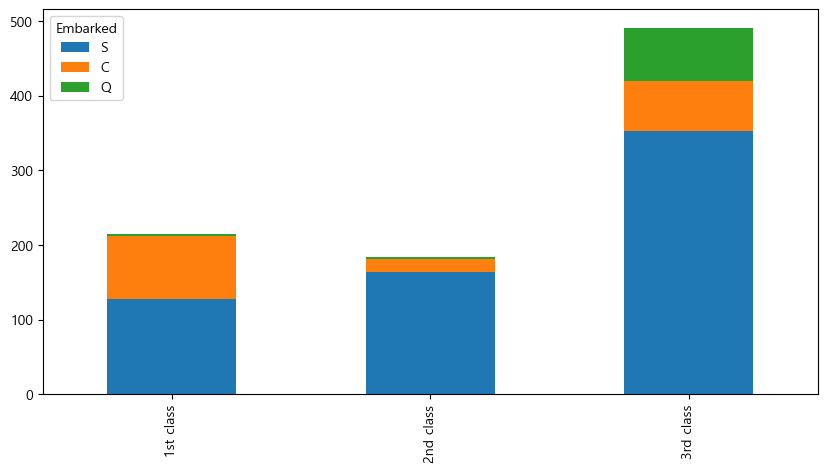

In [299]:
Pclass1= train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2= train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3= train[train['Pclass']==3]['Embarked'].value_counts()

df=pd.DataFrame([Pclass1,Pclass2,Pclass3])

df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))



In [300]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [301]:
embarked_mapping={"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].map(embarked_mapping)
    

# Fare: 티켓 가격
#### 결측치가 존재하는 경우: pclass( 등급별) 가격으로 판단하여 채울수 있다

In [302]:
# 결측치 매우기
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,1,2


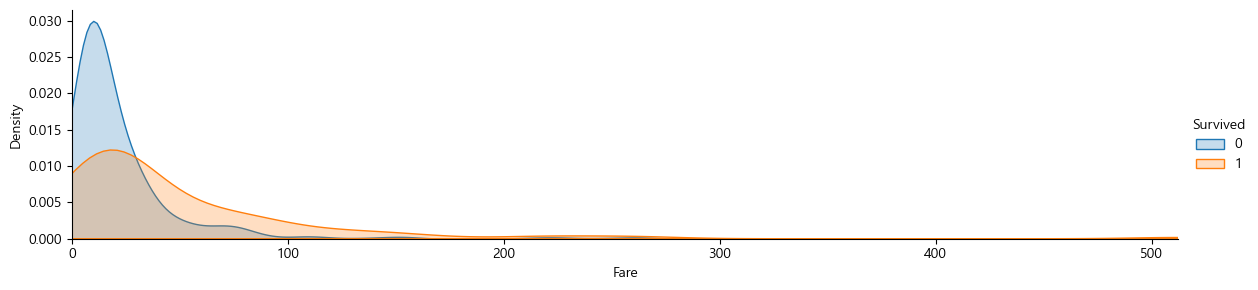

In [303]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [304]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

# cabin (객실 넘버)

In [305]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [306]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

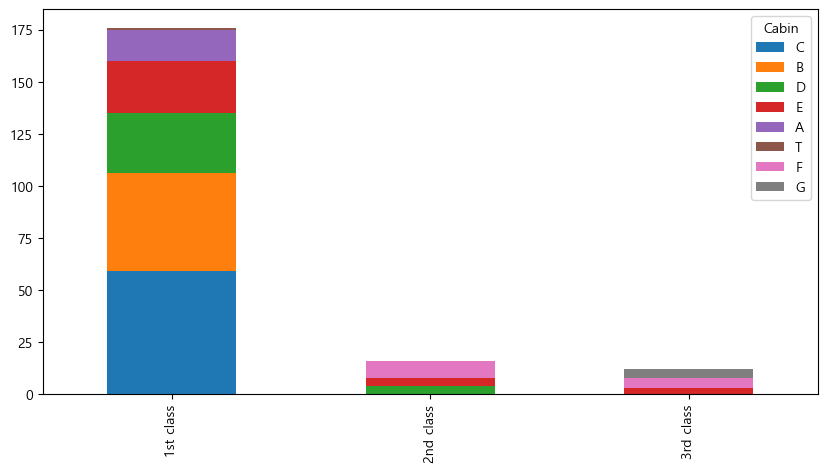

In [307]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [308]:

cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

# cabin 결측치를 승객의 티켓 클래스에 따라 구분된 cabin의 중앙값으로 채움
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [309]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

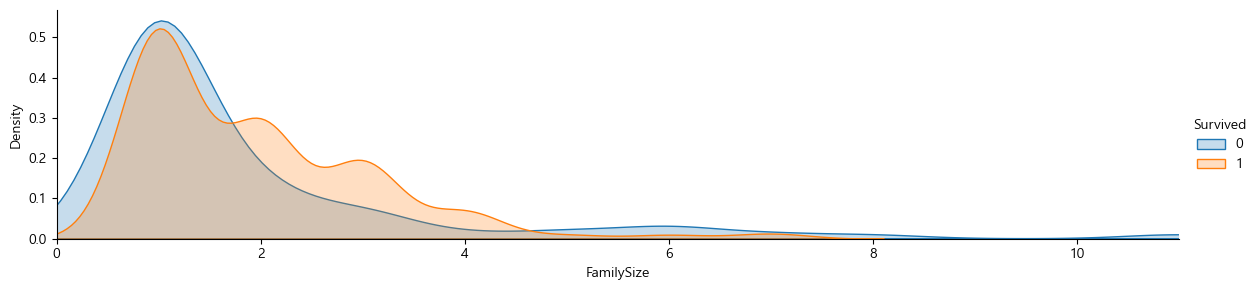

In [310]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [311]:

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [312]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# drop할 칼럼 드랍


In [313]:
features_drop = ['Ticket', 'SibSp', 'Parch','Name']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [314]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [315]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


# Modeling


In [316]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [317]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# CROSS VALIDATION (K-FOLD)
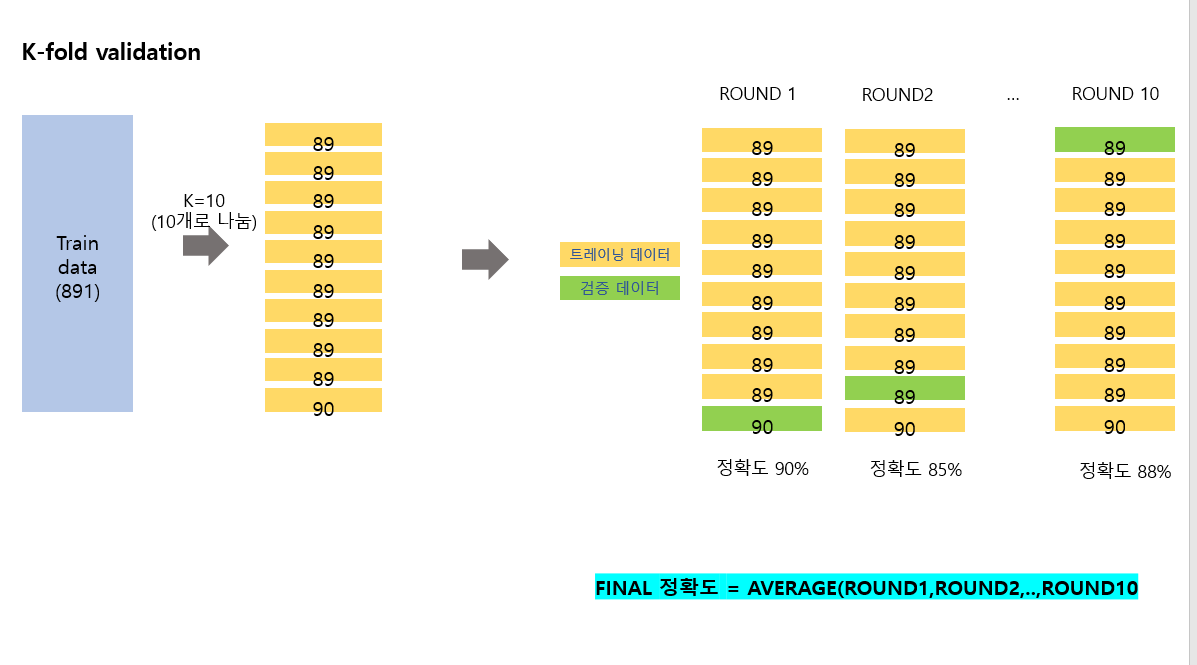

In [318]:
# K-FOLD이용을 위한 IMPORT
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# KNN

In [319]:

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.82022472 0.83146067 0.85393258 0.83146067
 0.84269663 0.80898876 0.83146067 0.83146067]


In [320]:
# knn score
knn_score=round(np.mean(score)*100,2)

# Decision Tree

In [321]:

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.79775281 0.78651685 0.76404494 0.88764045 0.75280899
 0.83146067 0.82022472 0.74157303 0.79775281]


In [322]:
# decision tree Score
decision_tree_score=round(np.mean(score)*100, 2)

# random forest

In [323]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.85393258 0.79775281 0.78651685 0.87640449 0.79775281
 0.79775281 0.78651685 0.74157303 0.84269663]


In [324]:

# Random Forest Score
random_forest_score=round(np.mean(score)*100, 2)

# navie bayes

In [325]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [326]:
#  Naive Bayes Score
navie_bayes_score=round(np.mean(score)*100, 2)

# svm

In [327]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [328]:
svm_score=round(np.mean(score)*100,2)
print(svm_score)

83.5


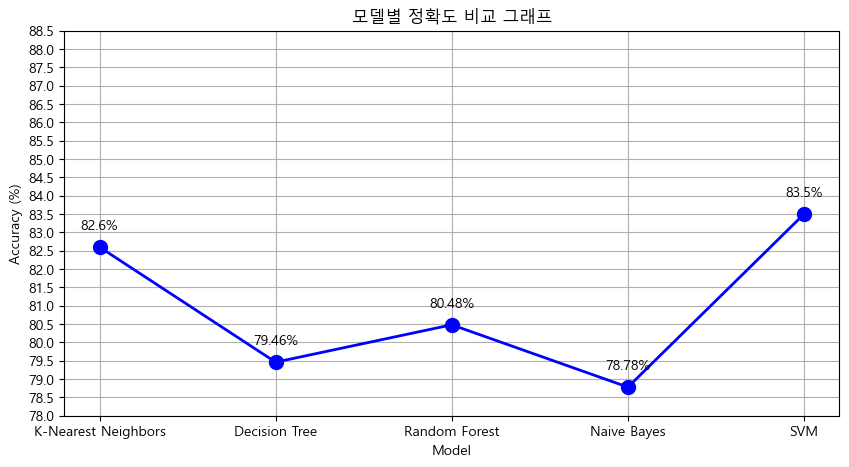

In [329]:



plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore') 


# 이미 계산된 각 모델의 정확도 값 리스트
accuracy_scores = [
    knn_score,             # K-Nearest Neighbors
    decision_tree_score,   # Decision Tree
    random_forest_score,   # Random Forest
    navie_bayes_score,     # Naive Bayes
    svm_score              # SVM
]

model_names = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
indices = range(len(model_names))  # 모델명에 해당하는 인덱스 생성





# 선 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(indices, accuracy_scores, marker='o', markersize=10, linestyle='-', linewidth=2, color='b')  # 선 그래프
plt.xticks(indices, model_names)  # X축에 모델명 표시
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('모델별 정확도 비교 그래프')
plt.ylim([78, 88])  # Y축 범위 설정
plt.yticks(np.arange(78, 89, 0.5))  # Y축 눈금 간격을 0.5로 설정
plt.grid(True)  # 그리드 추가

# 각 데이터 포인트에 대한 정확도 값 라벨 추가
for i, txt in enumerate(accuracy_scores):
    plt.annotate(f"{txt}%", (indices[i], accuracy_scores[i] + 0.1), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


# svm의 정확도가 가장 높아서 svm을 채택

In [330]:
clf = SVC()
clf.fit(train_data, target) 

# 테스트 데이터 준비: passengerid 열 제외한 데이터를 test_data로 복사
test_data = test.drop("PassengerId", axis=1).copy()

# 준비된 데이터로 예측수행
prediction = clf.predict(test_data)

In [331]:
# 예측된 Survived값과 test 데이터셋의 Passengerid를 조합해 submission.csv 파일 생성
# submission.csv: 승객id별 생존 여부를 포함한 형태의 csv 파일
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [332]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
